In [12]:
import pandas as pd
import numpy as np
import datetime 
from pandas_datareader import data as pdr
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import normaltest
from scipy.stats import anderson
import scipy.stats
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import hvplot.pandas
%matplotlib inline
from yahoofinancials import YahooFinancials

In [72]:
#Analyze the last year of Bitcoin data, and S&P500
start_sp = datetime.datetime(2018, 10, 1)
end_sp = datetime.datetime(2019, 10, 1)

#create dataframes for BTC 
BTC_df_trailing_one_year = pdr.get_data_yahoo('BTC-USD', start_sp, end_sp)
SPX_df_trailing_one_year = pdr.get_data_yahoo('^GSPC', start_sp, end_sp)
AGG_df_trailing_one_year = pdr.get_data_yahoo('AGG', start_sp, end_sp)

In [74]:
#checking for null data in BTC
BTC_df_trailing_one_year.isnull().mean()*100
#checking data types
BTC_df_trailing_one_year.dtypes
#checking number of records
BTC_df_trailing_one_year.count()
BTC_df_trailing_one_year.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-09-30,6653.299805,6549.080078,6619.850098,6589.620117,4000970000,6589.620117
2018-10-01,6611.839844,6537.899902,6593.240234,6556.100098,3979260000,6556.100098
2018-10-02,6571.459961,6454.029785,6553.859863,6502.589844,3887310000,6502.589844
2018-10-03,6603.310059,6497.910156,6497.910156,6576.689941,3838410000,6576.689941
2018-10-04,6623.620117,6557.410156,6574.149902,6622.479980,3671500000,6622.479980


In [40]:
#checking for null data in SPX
SPX_df_trailing_one_year.isnull().mean()*100
#checking data types
SPX_df_trailing_one_year.dtypes
#checking number of records
SPX_df_trailing_one_year.count()

High         253
Low          253
Open         253
Close        253
Volume       253
Adj Close    253
dtype: int64

In [42]:
#checking for null data in AGG
AGG_df_trailing_one_year.isnull().mean()*100
#checking data types
AGG_df_trailing_one_year.dtypes
#checking number of records
AGG_df_trailing_one_year.count()

High         253
Low          253
Open         253
Close        253
Volume       253
Adj Close    253
dtype: int64

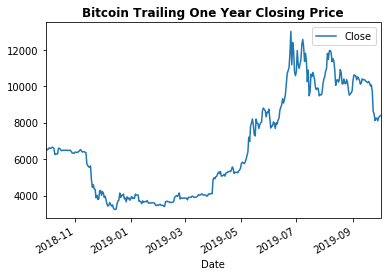

In [75]:
BTC_df_trailing_one_year.plot(y="Close")
plt.title("Bitcoin Trailing One Year Closing Price", weight="bold");


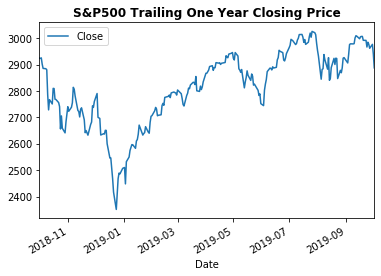

In [45]:
SPX_df_trailing_one_year.plot(y="Close")
plt.title("S&P500 Trailing One Year Closing Price", weight="bold");

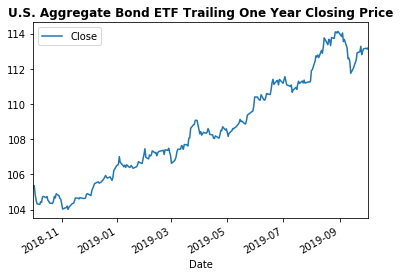

In [46]:
AGG_df_trailing_one_year.plot(y="Close")
plt.title("U.S. Aggregate Bond ETF Trailing One Year Closing Price", weight="bold");

In [83]:
#BTC closing price, daily returns, average daily returns and standard deviation
#extracting the closing price and calculating daily returns 
BTC_df_trailing_one_year_close = (BTC_df_trailing_one_year['Close'])

#calculate the daily returns 
BTC_df_trailing_one_year_daily_returns = BTC_df_trailing_one_year_close.pct_change()
BTC_df_trailing_one_year_daily_returns = BTC_df_trailing_one_year_daily_returns.fillna(0, inplace=False)

#calculate the average daily returns and standard deviation of daily returns
BTC_df_trailing_one_year_daily_returns_avg = BTC_df_trailing_one_year_daily_returns.mean()
BTC_df_trailing_one_year_daily_return_STD = BTC_df_trailing_one_year_daily_return.std()


In [65]:
#SPX closing price, daily returns, average daily returns and standard deviation
#extracting the closing price and calculating daily returns 
SPX_df_trailing_one_year_close = (SPX_df_trailing_one_year['Close'])

#calculate the daily returns 
SPX_df_trailing_one_year_daily_returns = SPX_df_trailing_one_year_close.pct_change()
SPX_df_trailing_one_year_daily_returns = SPX_df_trailing_one_year_daily_returns.fillna(0, inplace=False)


#calculate the average daily returns and standard deviation of daily returns
SPX_df_trailing_one_year_daily_returns_avg = SPX_df_trailing_one_year_daily_returns.mean()
SPX_df_trailing_one_year_daily_return_STD = SPX_df_trailing_one_year_daily_return.std()

In [66]:
SPX_df_trailing_one_year_daily_returns.head()

Date
2018-10-01    0.000000
2018-10-02   -0.000397
2018-10-03    0.000712
2018-10-04   -0.008169
2018-10-05   -0.005528
Name: Close, dtype: float64

In [62]:
#AGG closing price, daily returns, average daily returns and standard deviation
#extracting the closing price and calculating daily returns 
AGG_df_trailing_one_year_close = (AGG_df_trailing_one_year['Close'])

#calculate the daily returns 
AGG_df_trailing_one_year_daily_returns = AGG_df_trailing_one_year_close.pct_change()
AGG_df_trailing_one_year_daily_returns = AGG_df_trailing_one_year_daily_returns.fillna(0, inplace=False)

#calculate the average daily returns and standard deviation of daily returns
AGG_df_trailing_one_year_daily_returns_avg = AGG_df_trailing_one_year_daily_returns.mean()
AGG_df_trailing_one_year_daily_return_STD = AGG_df_trailing_one_year_daily_returns.std()

In [63]:
AGG_df_trailing_one_year_daily_returns.head()

Date
2018-10-01    0.000000
2018-10-02    0.001140
2018-10-03   -0.004746
2018-10-04   -0.002861
2018-10-05   -0.002200
Name: Close, dtype: float64

In [93]:
#Compare the trailing one year Sharpe Ratio

sharpe_ratio_BTC_trailing = (BTC_df_trailing_one_year_daily_returns_avg * 366) / (BTC_df_trailing_one_year_daily_return_STD * np.sqrt(366))
print(f" Bitcoin Trailing One Year Sharpe Ratio: {sharpe_ratio_BTC_trailing}")

sharpe_ratio_SPX_trailing = (SPX_df_trailing_one_year_daily_returns_avg * 252) / (SPX_df_trailing_one_year_daily_return_STD * np.sqrt(252))
print(f" S&P 500 Trailing One Year Sharpe Ratio: {sharpe_ratio_SPX_trailing}")

sharpe_ratio_AGG_trailing = (AGG_df_trailing_one_year_daily_returns_avg * 252) / (AGG_df_trailing_one_year_daily_return_STD * np.sqrt(252))
print(f" AGG Trailing One Year Sharpe Ratio: {sharpe_ratio_AGG_trailing}")

 Bitcoin Trailing One Year Sharpe Ratio: 0.6929923270649242
 S&P 500 Trailing One Year Sharpe Ratio: 0.008019596830039227
 AGG Trailing One Year Sharpe Ratio: 2.3633334487005824


In [144]:
#resetting the BTC time series of daily returns to a dataframe to be used to calculate the Sortino ratio
BTC_df_trailing_one_year_daily_returns = BTC_df_trailing_one_year_daily_returns.reset_index()

#renaming closing price with daily returns 
BTC_df_trailing_one_year_daily_returns = BTC_df_trailing_one_year_daily_returns.rename(columns = {"Daily Returns": "BTC Daily Returns"}) 
BTC_df_trailing_one_year_daily_returns.head()

,Date,BTC Daily Returns
0,2018-09-30,0.000000
1,2018-10-01,-0.005087
2,2018-10-02,-0.008162
3,2018-10-03,0.011395
4,2018-10-04,0.006962


In [96]:
#calculating the Sortino Ratio, excess return per unit of downside risk
rfr = 0
target = 0

BTC_df_trailing_one_year_daily_returns['downside_returns'] = 0
BTC_df_trailing_one_year_daily_returns.loc[BTC_df_trailing_one_year_daily_returns['Daily Returns'] < target, 'downside_returns'] = BTC_df_trailing_one_year_daily_returns['Daily Returns']**2
expected_return = BTC_df_trailing_one_year_daily_returns['Daily Returns'].mean()
down_stdev = np.sqrt(BTC_df_trailing_one_year_daily_returns['downside_returns'].mean())
sortino_ratio_one_year_trailing_BTC = (expected_return - rfr)/down_stdev
print(f" Bitcoin One Year Trailing Sortino Ratio: {sortino_ratio_one_year_trailing_BTC}")

 Bitcoin One Year Trailing Sortino Ratio: 0.05312953458264416


In [138]:
BTC_df_trailing_one_year_daily_returns = BTC_df_trailing_one_year_daily_returns.drop('downside_returns', axis=1)
BTC_df_trailing_one_year_daily_returns.head()

,Date,Daily Returns
0,2018-09-30,0.000000
1,2018-10-01,-0.005087
2,2018-10-02,-0.008162
3,2018-10-03,0.011395
4,2018-10-04,0.006962


In [143]:
#resetting the SPX time series of daily returns to a dataframe to be used to calculate the Sortino ratio
SPX_df_trailing_one_year_daily_returns = SPX_df_trailing_one_year_daily_returns.reset_index()

#renaming closing price with daily returns  
SPX_df_trailing_one_year_daily_returns = BTC_df_trailing_one_year_daily_returns.rename(columns = {"Daily Returns": "SPX Daily Returns"}) 
SPX_df_trailing_one_year_daily_returns.head()

,Date,SPX Daily Returns
0,2018-09-30,0.000000
1,2018-10-01,-0.005087
2,2018-10-02,-0.008162
3,2018-10-03,0.011395
4,2018-10-04,0.006962


In [107]:
#calculating the SPX Sortino Ratio, excess return per unit of downside risk
rfr = 0
target = 0

SPX_df_trailing_one_year_daily_returns['Downside_Returns'] = 0
SPX_df_trailing_one_year_daily_returns.loc[SPX_df_trailing_one_year_daily_returns['Daily Returns'] < target, 'Downside_Returns'] = SPX_df_trailing_one_year_daily_returns['Daily Returns']**2
expected_return = SPX_df_trailing_one_year_daily_returns['Daily Returns'].mean()
down_stdev = np.sqrt(SPX_df_trailing_one_year_daily_returns['Downside_Returns'].mean())
sortino_ratio_one_year_trailing_SPX = (expected_return - rfr)/down_stdev

In [108]:
print(f" SPX One Year Trailing Sortino Ratio: {sortino_ratio_one_year_trailing_SPX}")

 SPX One Year Trailing Sortino Ratio: 0.0006855934448519404


In [135]:
SPX_df_trailing_one_year_daily_returns = SPX_df_trailing_one_year_daily_returns.drop('Downside_Returns', axis=1)
SPX_df_trailing_one_year_daily_returns.head()

,Date,Daily Returns
0,2018-10-01,0.000000
1,2018-10-02,-0.000397
2,2018-10-03,0.000712
3,2018-10-04,-0.008169
4,2018-10-05,-0.005528


In [142]:
#resetting the AGG time series of daily returns to a dataframe to be used to calculate the Sortino ratio
AGG_df_trailing_one_year_daily_returns = AGG_df_trailing_one_year_daily_returns.reset_index()

#renaming closing price with daily returns 
AGG_df_trailing_one_year_daily_returns = AGG_df_trailing_one_year_daily_returns.rename(columns = {"Daily Returns": "AGG Daily Returns"}) 
AGG_df_trailing_one_year_daily_returns.head()

,Date,AGG Daily Returns
0,2018-10-01,0.000000
1,2018-10-02,0.001140
2,2018-10-03,-0.004746
3,2018-10-04,-0.002861
4,2018-10-05,-0.002200


In [118]:
#calculating the SPX Sortino Ratio, excess return per unit of downside risk
rfr = 0
target = 0

AGG_df_trailing_one_year_daily_returns['Downside_Returns'] = 0
AGG_df_trailing_one_year_daily_returns.loc[AGG_df_trailing_one_year_daily_returns['Daily Returns'] < target, 'Downside_Returns'] = AGG_df_trailing_one_year_daily_returns['Daily Returns']**2
expected_return = AGG_df_trailing_one_year_daily_returns['Daily Returns'].mean()
down_stdev = np.sqrt(AGG_df_trailing_one_year_daily_returns['Downside_Returns'].mean())
sortino_ratio_one_year_trailing_AGG = (expected_return - rfr)/down_stdev

In [119]:
print(f" AGG One Year Trailing Sortino Ratio: {sortino_ratio_one_year_trailing_AGG}")

 AGG One Year Trailing Sortino Ratio: 0.22291502939931693


In [134]:
AGG_df_trailing_one_year_daily_returns = AGG_df_trailing_one_year_daily_returns.drop('Downside_Returns', axis=1)
AGG_df_trailing_one_year_daily_returns.head()

,Date,Daily Returns
0,2018-10-01,0.000000
1,2018-10-02,0.001140
2,2018-10-03,-0.004746
3,2018-10-04,-0.002861
4,2018-10-05,-0.002200


In [121]:
AGG_df_trailing_one_year_daily_returns['Daily Returns'].mean()

0.0002901259439836296